In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
path='/content/drive/MyDrive/iris.csv'
df=pd.read_csv(path)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df1=df.drop(columns=['PetalLengthCm','PetalWidthCm'])
df1.head()

,Id,SepalLengthCm,SepalWidthCm,Species
0,1,5.1,3.5,Iris-setosa
1,2,4.9,3.0,Iris-setosa
2,3,4.7,3.2,Iris-setosa
3,4,4.6,3.1,Iris-setosa
4,5,5.0,3.6,Iris-setosa


In [12]:
df_train=pd.concat([df1[:40],df1[50:90],df1[100:140]],ignore_index=True)
df_train.head()

,Id,SepalLengthCm,SepalWidthCm,Species
0,1,5.1,3.5,Iris-setosa
1,2,4.9,3.0,Iris-setosa
2,3,4.7,3.2,Iris-setosa
3,4,4.6,3.1,Iris-setosa
4,5,5.0,3.6,Iris-setosa


In [13]:
df_test=pd.concat([df1[40:50],df1[90:100],df1[140:150]],ignore_index=True)
df_test.head()

,Id,SepalLengthCm,SepalWidthCm,Species
0,41,5.0,3.5,Iris-setosa
1,42,4.5,2.3,Iris-setosa
2,43,4.4,3.2,Iris-setosa
3,44,5.0,3.5,Iris-setosa
4,45,5.1,3.8,Iris-setosa


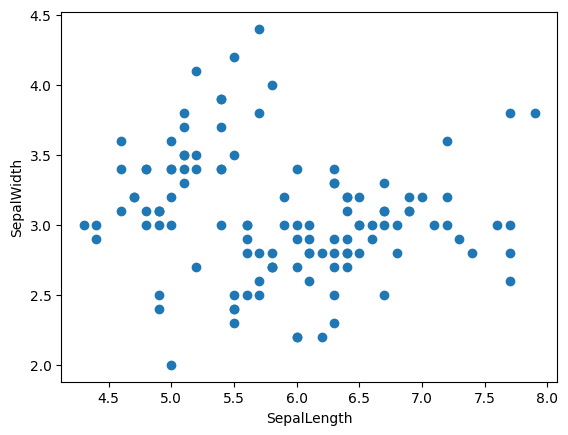

In [14]:
x=df_train['SepalLengthCm'].values
y=df_train['SepalWidthCm'].values
plt.scatter(x,y)
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.show()

In [15]:
import math
def euclidian_distane(x1,y1,x2,y2):
    dis=(x1-x2)**2+(y1-y2)**2
    dis=math.sqrt(dis)
    return dis
x=df_test['SepalLengthCm'].values
y=df_test['SepalWidthCm'].values
lis=[]
for i in range(len(x)):
    x1=df_train['SepalLengthCm'].values
    y1=df_train['SepalWidthCm'].values
    lis1=[]
    for j in range(len(x1)):
        dis=euclidian_distane(x[i],y[i],x1[j],y1[j])
        lis1.append(dis)
    lis.append(lis1)
df_distance=pd.DataFrame(lis)
df_distance=df_distance.T
df_distance


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.100000,1.341641,0.761577,0.100000,0.300000,0.583095,0.300000,0.583095,0.282843,0.223607,...,1.649242,1.843909,1.063015,1.726268,1.612452,1.676305,1.562050,1.486607,1.104536,0.943398
1,0.509902,0.806226,0.538516,0.509902,0.824621,0.100000,0.824621,0.360555,0.806226,0.316228,...,1.802776,2.002498,0.948683,1.910497,1.824829,1.800000,1.486607,1.600000,1.360147,1.000000
2,0.424264,0.921954,0.300000,0.424264,0.721110,0.223607,0.721110,0.100000,0.781025,0.316228,...,2.002498,2.202272,1.208305,2.100000,2.002498,2.009975,1.746425,1.811077,1.513275,1.216553
3,0.565685,0.806226,0.223607,0.565685,0.860233,0.223607,0.860233,0.100000,0.921954,0.447214,...,2.100000,2.300000,1.264911,2.202272,2.109502,2.102380,1.802776,1.902630,1.627882,1.303840
4,0.100000,1.392839,0.721110,0.100000,0.223607,0.632456,0.223607,0.565685,0.316228,0.300000,...,1.772005,1.964688,1.204159,1.843909,1.726268,1.802776,1.702939,1.615549,1.216553,1.081665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2.745906,3.275668,3.306055,2.745906,2.720294,2.900000,2.720294,3.106445,2.500000,2.716616,...,1.004988,0.806226,1.923538,0.921954,1.044031,1.000000,1.486607,1.200000,1.552417,1.800000
116,1.303840,2.109502,1.910497,1.303840,1.264911,1.552417,1.264911,1.711724,1.044031,1.303840,...,0.500000,0.670820,0.860233,0.538516,0.412311,0.565685,0.900000,0.447214,0.100000,0.565685
117,1.456022,2.061553,2.002498,1.456022,1.476482,1.603122,1.476482,1.802776,1.252996,1.414214,...,0.300000,0.500000,0.721110,0.412311,0.360555,0.316228,0.608276,0.141421,0.360555,0.509902
118,1.118034,1.655295,1.612452,1.118034,1.204159,1.200000,1.204159,1.414214,0.989949,1.044031,...,0.707107,0.905539,0.360555,0.824621,0.761577,0.700000,0.583095,0.500000,0.447214,0.100000


In [16]:
k=int(input("Enter the k nearest neighbors\n"))
x=df_distance.columns
x=list(x)
lis1=[]
indices=[]
for i in x:
    y=df_distance[i].values
    y=np.array(y)
    sorted_indices = np.argsort(y)[:k]
    indices.append(sorted_indices)
    y.sort()
    lis=[]
    for j in range(k):
        lis.append(y[j])
    lis1.append(lis)
df_nearest_distance=pd.DataFrame(lis1)
df_indices=pd.DataFrame(indices)
df_nearest_distance=df_nearest_distance.T
df_nearest_distance

Enter the k nearest neighbors
5


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.1,0.412311,0.200000,0.1,0.000000,0.000000,0.000000,0.100000,0.100000,0.100000,...,0.000000,0.000000,0.000000,0.100000,0.000000,0.0,0.000000,0.000000,0.100000,0.000000
1,0.1,0.447214,0.223607,0.1,0.100000,0.100000,0.100000,0.100000,0.200000,0.100000,...,0.000000,0.000000,0.000000,0.141421,0.200000,0.1,0.200000,0.000000,0.141421,0.100000
2,0.1,0.583095,0.223607,0.1,0.223607,0.100000,0.223607,0.100000,0.223607,0.100000,...,0.100000,0.100000,0.000000,0.141421,0.200000,0.1,0.200000,0.100000,0.141421,0.141421
3,0.1,0.608276,0.282843,0.1,0.300000,0.141421,0.300000,0.200000,0.223607,0.100000,...,0.141421,0.141421,0.100000,0.141421,0.223607,0.1,0.223607,0.141421,0.200000,0.200000
4,0.1,0.707107,0.300000,0.1,0.300000,0.141421,0.300000,0.223607,0.223607,0.141421,...,0.141421,0.141421,0.141421,0.141421,0.223607,0.1,0.223607,0.141421,0.282843,0.200000


In [17]:
df_indices=df_indices.T
df_indices

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0,47,38,0,19,12,19,3,10,35,...,76,119,81,100,104,67,62,84,116,51
1,17,86,3,17,21,30,21,2,21,23,...,55,42,72,104,76,92,103,96,80,118
2,4,50,13,4,4,1,4,29,27,26,...,67,100,57,76,55,55,77,65,46,68
3,7,8,6,7,17,34,17,6,16,7,...,92,40,94,55,90,76,114,117,75,107
4,26,38,29,26,0,9,0,30,19,39,...,65,92,45,119,100,65,91,48,41,60


In [18]:
def votes(lis):
    x1=0
    x2=0
    x3=0
    for i in lis:
        if(i==0 or 0<i<39 or i==39):
            x1+=1
        elif(i==50 or 50<i<89 or i==89):
            x2+=1
        elif(i==90 or 90<i<119 or i==119):
            x3+=1
    lis=np.array([x1,x2,x3])
    x=np.argmax(lis)
    y=' '
    if(x==0):
        y='Iris-setosa'
    elif(x==1):
        y='Iris-versicolor'
    elif(x==2):
        y='Iris-virginica'

    return y

indi_columns=df_indices.columns
lis=[]
for i in indi_columns:
    val=df_indices[i].values
    val=list(val)
    u=votes(val)
    lis.append(u)
df_vote=pd.DataFrame(lis)
df_vote

,0
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
5,Iris-setosa
6,Iris-setosa
7,Iris-setosa
8,Iris-setosa
9,Iris-setosa


In [19]:
def accuracy(df_vote):
    test=df_test['Species'].values
    test=list(test)
    pred=df_vote[0].values
    pred=list(pred)
    sum=0
    for i in range(len(pred)):
        if(test[i]==pred[i]):
            sum+=1
    total=len(pred)
    x=sum/total
    return x
y=accuracy(df_vote)
print("Accuracy :",y*100)


Accuracy : 80.0


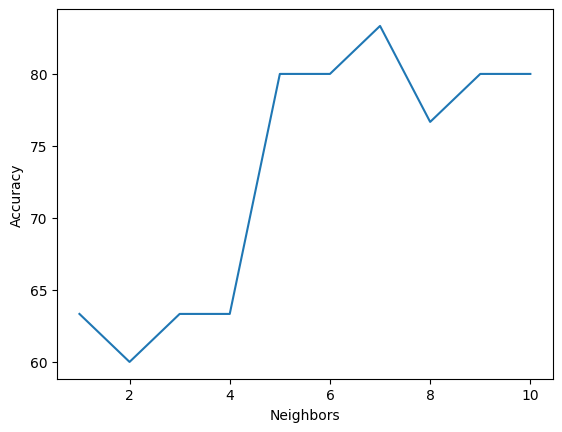

In [20]:
K_values=10
x1=[]
acc=[]
x=df_distance.columns
for i in range(1,K_values+1):
    x1.append(i)
    indices=[]
    for j in x:
        y=df_distance[j].values
        y=np.array(y)
        sorted_indices = np.argsort(y)[:i]
        indices.append(sorted_indices)
    df_indices=pd.DataFrame(indices)
    df_indices=df_indices.T
    indi_columns=df_indices.columns
    lis=[]
    for i in indi_columns:
        val=df_indices[i].values
        val=list(val)
        u=votes(val)
        lis.append(u)
    df_vote=pd.DataFrame(lis)
    y1=accuracy(df_vote)
    y1=y1*100
    acc.append(y1)
x1=np.array(x1)
acc=np.array(acc)
plt.plot(x1,acc)
plt.xlabel("Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [21]:
df_train_1=pd.concat([df[:40],df[50:90],df[100:140]],ignore_index=True)
df_train_1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
df_test_1=pd.concat([df[40:50],df[90:100],df[140:150]],ignore_index=True)
df_test_1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,41,5.0,3.5,1.3,0.3,Iris-setosa
1,42,4.5,2.3,1.3,0.3,Iris-setosa
2,43,4.4,3.2,1.3,0.2,Iris-setosa
3,44,5.0,3.5,1.6,0.6,Iris-setosa
4,45,5.1,3.8,1.9,0.4,Iris-setosa


In [23]:
def euclidian_distane(x1,y1,z1,a1,x2,y2,z2,a2):
    dis=(x1-x2)**2+(y1-y2)**2 +(z1-z2)**2+(a1-a2)**2
    dis=math.sqrt(dis)
    return dis
x=df_test_1['SepalLengthCm'].values
y=df_test_1['SepalWidthCm'].values
z=df_test_1['PetalLengthCm'].values
a=df_test_1['PetalWidthCm'].values
lis=[]
for i in range(len(x)):
    x1=df_train_1['SepalLengthCm'].values
    y1=df_train_1['SepalWidthCm'].values
    z1=df_train_1['PetalLengthCm'].values
    a1=df_train_1['PetalWidthCm'].values
    lis1=[]
    for j in range(len(x1)):
        dis=euclidian_distane(x[i],y[i],z[i],a[i],x1[j],y1[j],z1[j],a1[j])
        lis1.append(dis)
    lis.append(lis1)
df_distance_1=pd.DataFrame(lis)
df_distance_1=df_distance_1.T
df_distance_1

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.173205,1.349074,0.768115,0.458258,0.616441,0.591608,0.360555,0.583095,0.300000,0.223607,...,5.019960,4.636809,4.208325,5.257376,5.136146,4.654031,4.276681,4.459821,4.650806,4.140048
1,0.529150,0.818535,0.547723,0.678233,0.984886,0.141421,0.848528,0.360555,0.812404,0.316228,...,5.072475,4.702127,4.180909,5.320714,5.206726,4.700000,4.249706,4.498889,4.718050,4.153312
2,0.435890,0.927362,0.300000,0.655744,0.959166,0.264575,0.781025,0.141421,0.806226,0.331662,...,5.228767,4.868265,4.334743,5.475400,5.353504,4.864155,4.430576,4.661545,4.848711,4.298837
3,0.608276,0.836660,0.300000,0.700000,0.969536,0.264575,0.866025,0.141421,0.921954,0.458258,...,5.104900,4.760252,4.177320,5.349766,5.232590,4.745524,4.288356,4.533211,4.719110,4.149699
4,0.173205,1.400000,0.728011,0.458258,0.583095,0.640312,0.300000,0.565685,0.331662,0.300000,...,5.061620,4.686150,4.246175,5.297169,5.173007,4.701064,4.330127,4.504442,4.678675,4.173727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,5.880476,6.145730,6.195159,5.538953,5.352569,5.873670,5.662155,6.012487,5.640922,5.820653,...,1.126943,1.284523,2.204541,0.943398,1.135782,1.345362,1.892089,1.529706,1.702939,2.118962
116,4.959839,5.229723,5.194228,4.576024,4.392038,4.945705,4.737088,5.040833,4.768648,4.917316,...,0.500000,0.842615,1.113553,0.624500,0.435890,0.700000,1.191638,0.721110,0.244949,0.964365
117,4.691482,4.913247,4.920366,4.332436,4.135215,4.650806,4.466542,4.756049,4.486647,4.622770,...,0.678233,0.812404,0.830662,0.761577,0.812404,0.663325,0.793725,0.387298,0.624500,0.648074
118,3.968627,4.152108,4.172529,3.595831,3.438023,3.905125,3.774917,4.014972,3.798684,3.900000,...,1.224745,1.077033,0.479583,1.462874,1.371131,0.948683,0.624500,0.670820,0.900000,0.316228


In [24]:
k=int(input("Enter the k nearest neighbors\n"))
x=df_distance_1.columns
x=list(x)
lis1=[]
indices=[]
for i in x:
    y=df_distance_1[i].values
    y=np.array(y)
    sorted_indices = np.argsort(y)[:k]
    indices.append(sorted_indices)
    y.sort()
    lis=[]
    for j in range(k):
        lis.append(y[j])
    lis1.append(lis)
df_nearest_distance_1=pd.DataFrame(lis1)
df_indices_1=pd.DataFrame(indices)
df_indices_1=df_indices_1.T
df_nearest_distance_1=df_nearest_distance_1.T
df_nearest_distance_1

Enter the k nearest neighbors
11


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.141421,0.624500,0.200000,0.223607,0.374166,0.141421,0.141421,0.141421,0.100000,0.141421,...,0.264575,0.360555,0.000000,0.223607,0.300000,0.360555,0.244949,0.223607,0.244949,0.282843
1,0.173205,0.714143,0.300000,0.264575,0.412311,0.200000,0.244949,0.141421,0.223607,0.173205,...,0.346410,0.469042,0.264575,0.316228,0.400000,0.374166,0.374166,0.346410,0.300000,0.316228
2,0.173205,0.781025,0.300000,0.316228,0.412311,0.244949,0.300000,0.223607,0.244949,0.223607,...,0.360555,0.509902,0.316228,0.387298,0.435890,0.374166,0.387298,0.360555,0.556776,0.331662
3,0.244949,0.793725,0.316228,0.374166,0.509902,0.264575,0.331662,0.223607,0.282843,0.223607,...,0.374166,0.547723,0.360555,0.412311,0.479583,0.424264,0.412311,0.387298,0.624500,0.360555
4,0.264575,0.818535,0.316228,0.424264,0.538516,0.264575,0.331662,0.300000,0.300000,0.223607,...,0.412311,0.608276,0.479583,0.489898,0.500000,0.547723,0.479583,0.387298,0.624500,0.374166
5,0.264575,0.836660,0.316228,0.435890,0.547723,0.264575,0.346410,0.300000,0.316228,0.244949,...,0.447214,0.648074,0.479583,0.556776,0.547723,0.574456,0.509902,0.412311,0.648074,0.458258
6,0.300000,0.911043,0.424264,0.447214,0.547723,0.264575,0.360555,0.300000,0.331662,0.264575,...,0.469042,0.692820,0.509902,0.556776,0.547723,0.574456,0.547723,0.435890,0.648074,0.469042
7,0.316228,0.916515,0.469042,0.458258,0.547723,0.264575,0.374166,0.346410,0.331662,0.264575,...,0.500000,0.761577,0.519615,0.624500,0.574456,0.591608,0.556776,0.469042,0.670820,0.538516
8,0.331662,0.927362,0.509902,0.458258,0.574456,0.300000,0.387298,0.346410,0.346410,0.264575,...,0.519615,0.774597,0.547723,0.632456,0.663325,0.616441,0.583095,0.469042,0.692820,0.538516
9,0.331662,0.938083,0.538516,0.458258,0.583095,0.316228,0.412311,0.346410,0.360555,0.300000,...,0.591608,0.781025,0.600000,0.648074,0.670820,0.616441,0.608276,0.500000,0.714143,0.583095


In [25]:
indi_columns=df_indices_1.columns
lis=[]
for i in indi_columns:
    val=df_indices_1[i].values
    val=list(val)
    u=votes(val)
    lis.append(u)
df_vote_1=pd.DataFrame(lis)
y=accuracy(df_vote_1)
print("Accuracy :",y*100)

Accuracy : 100.0


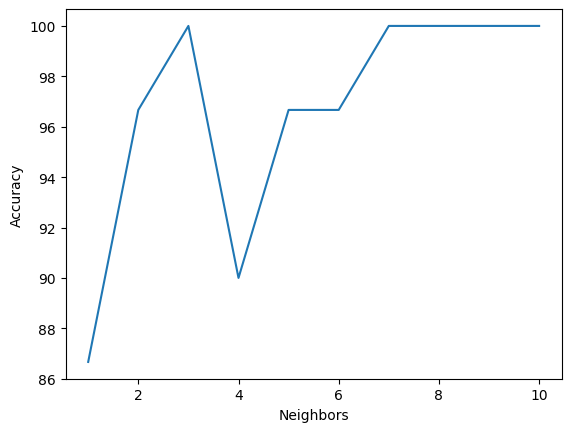

In [26]:
K_values=10
x1=[]
acc=[]
x=df_distance_1.columns
for i in range(1,K_values+1):
    x1.append(i)
    indices=[]
    for j in x:
        y=df_distance_1[j].values
        y=np.array(y)
        sorted_indices = np.argsort(y)[:i]
        indices.append(sorted_indices)
    df_indices_1=pd.DataFrame(indices)
    df_indices_1=df_indices_1.T
    indi_columns=df_indices_1.columns
    lis=[]
    for i in indi_columns:
        val=df_indices_1[i].values
        val=list(val)
        u=votes(val)
        lis.append(u)
    df_vote_1=pd.DataFrame(lis)
    y1=accuracy(df_vote_1)
    y1=y1*100
    acc.append(y1)
x1=np.array(x1)
acc=np.array(acc)
plt.plot(x1,acc)
plt.xlabel("Neighbors")
plt.ylabel("Accuracy")
plt.show()
